<a href="https://colab.research.google.com/github/satyampundi/satyampundi/blob/master/INT246_23_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install -U scikit-fuzzy

7.910691823899371


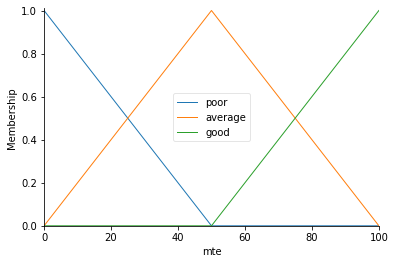

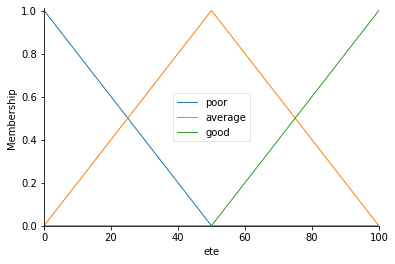

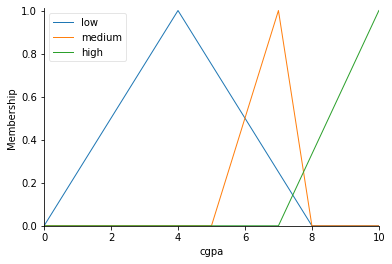

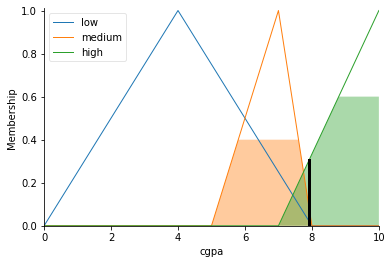

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ete=ctrl.Antecedent(np.arange(0,101,1),'ete')
mte=ctrl.Antecedent(np.arange(0,101,1),'mte')
cgpa=ctrl.Consequent(np.arange(0,11,1),'cgpa')

mte.automf(3)
ete.automf(3)
cgpa['low']=fuzz.trimf(cgpa.universe,[0,4,8])
cgpa['medium']=fuzz.trimf(cgpa.universe,[5,7,8])
cgpa['high']=fuzz.trimf(cgpa.universe,[7,10,10])

mte.view()
ete.view()
cgpa.view()

rule1=ctrl.Rule(mte['poor']|ete['poor'],cgpa['low'])
rule2=ctrl.Rule(mte['average'],cgpa['medium'])
rule3=ctrl.Rule(mte['good']|ete['good'],cgpa['high'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])

tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['mte']=80
tipping.input['ete']=80

tipping.compute()

print(tipping.output['cgpa'])

cgpa.view(sim=tipping)

In [9]:
pip install control

     |████████████████████████████████| 339 kB 5.2 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=c87ac22cb51df62958bdb2f4afa4ed1e1784fa8a0580f5bbe0de2c7860bc6352
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [12]:
pip install fuzzywuzzy

32.392857142857146


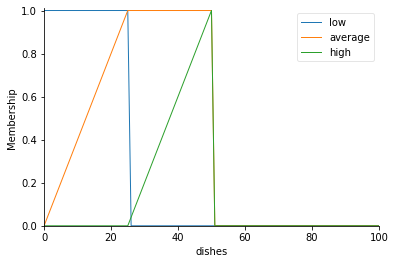

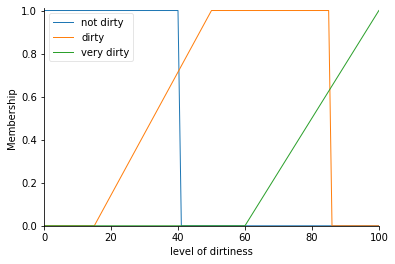

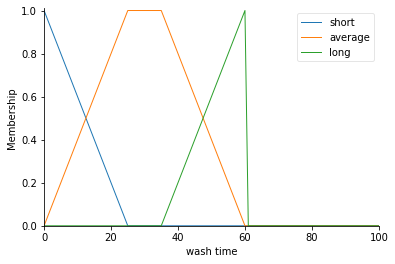

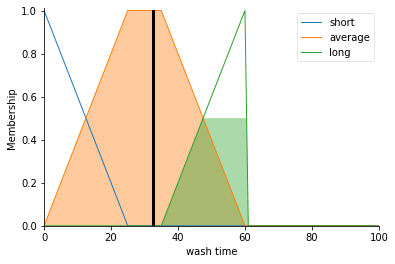

In [29]:
d=ctrl.Antecedent(np.arange(0,101,1),'dishes')
l=ctrl.Antecedent(np.arange(0,101,1),'level of dirtiness')
w=ctrl.Consequent(np.arange(0,101,1),'wash time')

d['low']=fuzz.trapmf(d.universe,[0,0,25,25])
d['average']=fuzz.trapmf(d.universe,[0,25,50,50])
d['high']=fuzz.trapmf(d.universe,[25,50,50,50])
l['not dirty']=fuzz.trapmf(l.universe,[0,0,40,40])
l['dirty']=fuzz.trapmf(l.universe,[15,50,85,85])
l['very dirty']=fuzz.trapmf(l.universe,[60,100,100,100])
w['short']=fuzz.trapmf(w.universe,[0,0,0,25])
w['average']=fuzz.trapmf(w.universe,[0,25,35,60])
w['long']=fuzz.trapmf(w.universe,[35,60,60,60])

d.view()
l.view()
w.view()

rule1=ctrl.Rule(d['low']|l['not dirty'],w['short'])
rule2=ctrl.Rule(d['high']&l['very dirty'],w['long'])
rule3=ctrl.Rule(d['low']&l['dirty'],w['short'])
rule4=ctrl.Rule(d['average']|l['dirty'],w['average'])
rule5=ctrl.Rule(d['high']|l['very dirty'],w['long'])
rule6=ctrl.Rule(d['high']&l['not dirty'],w['average'])
rule7=ctrl.Rule(d['average']|l['very dirty'],w['long'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])

tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['dishes']=95
tipping.input['level of dirtiness']=80

tipping.compute()

print(tipping.output['wash time'])

w.view(sim=tipping)

In [47]:

fs1={'a':0.1,'b':0.6,'c':0.5}
fs2={'a':0.4,'b':0.8,'c':0.8}

y=dict()
for k,j in zip(fs1,fs2):
  kv=fs1[k]
  jv=round(1-fs2[j],1)
  if kv<jv:
    y[k]=kv
  else:
    y[j]=jv
print('intersection',y)

intersection {'a': 0.1, 'b': 0.2, 'c': 0.2}
